# Data Exploratory Analysis

In [3]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file("../data/train_numeric.svm")
print("{} total parts.".format(X.shape[0]))
print("{} problematic parts ({}%).".format(len([l for l in y if l==1]),len([l for l in y if l==1])/float(len(y))* 100))
print("{} non-problematic parts ({}%).".format(len([l for l in y if l==0]),len([l for l in y if l==0])/float(len(y))* 100))

100000 total parts.
568 problematic parts (0.568%).
99432 non-problematic parts (99.432%).


**Highly unbalanced classes!! ** We will have to handle this somehow.

## Columns sparsity

In [47]:
col_nonmissing_values = []
for i in range(0,X.shape[1]):
    col_nonmissing_values.append(len(X.getcol(i).data))

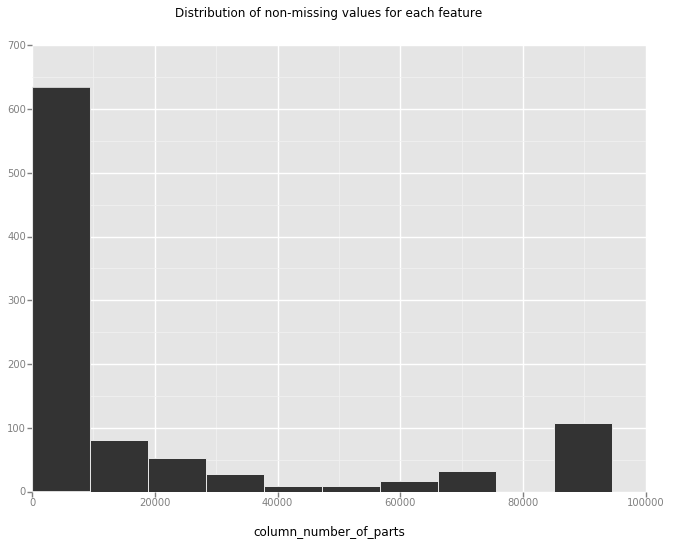

<ggplot: (8763885947017)>

In [48]:
from ggplot import *
import pandas as pd
%matplotlib inline 
df = pd.DataFrame(col_nonmissing_values,columns=['column_number_of_parts'])
df
p = ggplot(aes(x='column_number_of_parts'), data=df)
p + geom_histogram(binwidth=1) + ggtitle("Distribution of non-missing values for each feature")

In [54]:
print(len(df['column_number_of_parts']))
print(len(df['column_number_of_parts'].unique()))
df['column_number_of_parts'].unique()

968
110


array([57915, 57930, 29161, 28813, 28880, 28876, 29120, 29215, 28777,
       57907, 19477, 19479, 19286, 19288, 19287, 19327, 20166, 20169,
       10062, 10107, 10020, 10155, 10053, 10118, 20171,  6756,  6758,
        6702,  6725,  1835,  1833,  1823,   908,   930,   941,   894,
        2185,  2183,  1108,  1077,  1090,  1095, 11232, 11204, 11231,
        5670,  5579,  5633,  5632,  5600, 11233,  4351,  4335,  4338,
        4349,  4348,  4284,  2241,  2112,  2180,  2162,  4330,    76,
         276,   614,   350,   310,   305,   306,   611,   736,   358,
         181,   177,   173,   185,   271,  1390,  1389,  1022,   666,
         724,   710,   681, 18232, 10263,   708, 94410, 89812, 94415,
       94395, 67835,  3298,  2091, 93969, 94008, 46514, 46519, 48014,
       94474,  2321,  5202,  5200,  2641,  2640,  2605,  2542,  2543,
        2664,  5195])

## Rows sparsity

In [58]:
row_nonmissing_values = []
for i in range(0,X.shape[0]):
    row_nonmissing_values.append(len(X.getrow(i).data))

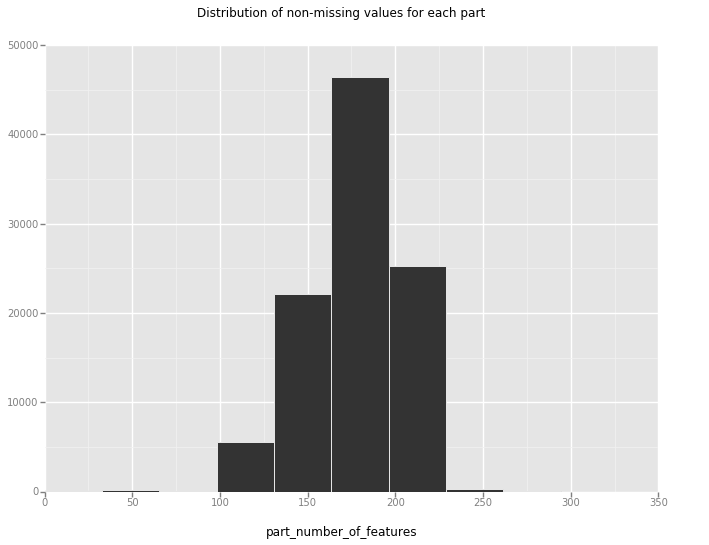

<ggplot: (8763885795801)>

In [59]:
df2 = pd.DataFrame(row_nonmissing_values,columns=['part_number_of_features'])
p = ggplot(aes(x='part_number_of_features'), data=df2)
p + geom_histogram(binwidth=0.1) + ggtitle("Distribution of non-missing values for each part")

In [60]:
print(len(df2['part_number_of_features']))
print(len(df2['part_number_of_features'].unique()))
df2['part_number_of_features'].unique()

100000
171


array([162, 192, 190, 210, 158, 160, 155, 159, 207, 204, 110, 164, 193,
       183, 112, 191, 115, 165, 161, 135, 206, 157, 209, 220, 178, 187,
       198, 201, 196, 166, 169, 253, 172, 174, 163,   0, 195, 175, 250,
       255, 203, 188, 106, 130, 124, 177, 180, 181, 170, 151, 235, 227,
       145, 129, 122, 120, 239, 127, 211,  54, 118, 126, 186, 218,  48,
       171, 143,   3, 184, 205, 189, 176, 128, 224, 114, 146, 156, 173,
       197, 200, 213, 247, 167, 202, 113, 208, 179, 149, 152,  46, 242,
       266, 147, 238, 142, 199, 215, 231, 217, 194, 249, 154, 107, 103,
       221, 125,  99, 241, 148, 259, 216, 116, 226, 240, 108, 150,  44,
       225, 263, 153, 140, 252, 214,   4, 228,  98, 222, 144, 141, 212,
        62,  89, 219, 101,  83, 136, 244, 123, 139, 270, 254, 168, 257,
       185, 223, 248,  67, 132, 251, 265, 121, 117, 133, 182, 260, 119,
        63, 134, 131, 236, 104, 111,  58, 327,  60, 256, 268, 138, 109,
        96,  49])